In [21]:
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
digits = fetch_openml('mnist_784', version = 1 )

In [19]:
x , y = digits['data'], digits['target']

In [20]:
len(x)

70000

In [24]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

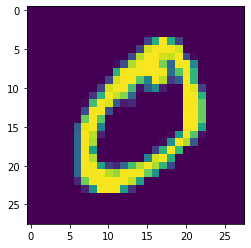

In [23]:
plt.imshow(x[1].reshape(-1,28))
plt.show()

In [34]:
np.unique(y_7, return_counts=True)

(array([False,  True]), array([62707,  7293], dtype=int64))

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# x_train,x_test,y_7_train,y_7_test = train_test_split(x,y_7,test_size = 0.2, random_seed = 42)

In [46]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

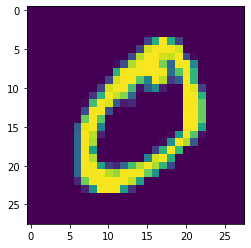

In [47]:
plt.imshow(x_train[1].reshape(-1,28))

In [48]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [49]:
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

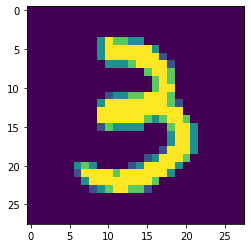

In [50]:
plt.imshow(x_train[1].reshape(-1,28))

In [59]:
y_7 = (y_train=='7')

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10)

In [62]:
sgd_clf.fit(x_train,y_7)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

In [70]:
sgd_clf.predict([x_test[3]])

array([False])

In [73]:
from sklearn.metrics import classification_report

In [79]:
y_pred = sgd_clf.predict(x_train)
y_pred

array([ True, False, False, ..., False, False, False])

In [87]:
classification_report(y_7,y_pred,output_dict = True)['True']

{'precision': 0.8437147688838782,
 'recall': 0.9556264964086193,
 'f1-score': 0.8961904049098122,
 'support': 6265}

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_7,y_pred)

0.9768833333333333

In [99]:
from sklearn.model_selection import cross_val_predict
score = cross_val_predict(sgd_clf,x_train,y_7,method='decision_function',cv = 5)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceW

In [100]:
from sklearn.metrics import precision_recall_curve

In [103]:
precision, recall,threshold = precision_recall_curve(y_7,score)

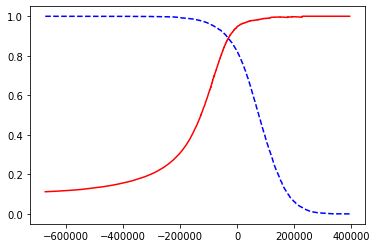

In [104]:
plt.plot(threshold, precision[:-1],'r-')
plt.plot(threshold, recall[:-1],'b--')
plt.show()

In [105]:
len(precision)

55735

In [106]:
len(threshold)

55734

In [107]:
precision_recall_curve?

Signature:
precision_recall_curve(
    y_true,
    probas_pred,
    pos_label=None,
    sample_weight=None,
)
Docstring:
Compute precision-recall pairs for different probability thresholds

Note: this implementation is restricted to the binary classification task.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1. and 0. respectively and do not
have a corresponding threshold.  This ensures that the graph starts on the
y axis.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : arra